In [18]:
COMMA = ","
FIRST_LINE = True
data = []
IN2CM, LB2KG = 2.54, 0.454

In [19]:
for line in open("./weight-height_10000.csv"):
    if FIRST_LINE:
        FIRST_LINE = False
    else:
        g, raw_h, raw_w = line.strip().split(COMMA)
        h = int(float(raw_h) * IN2CM + 0.5)
        w = int(float(raw_w) * LB2KG + 0.5)
        data.append((g,h,w))

In [20]:
print(data[:10])

[('Male', 188, 110), ('Male', 175, 74), ('Male', 188, 97), ('Male', 182, 100), ('Male', 177, 94), ('Male', 171, 69), ('Male', 175, 84), ('Male', 174, 76), ('Male', 170, 80), ('Male', 161, 71)]


In [4]:
import pandas as pd
data = pd.read_csv("./weight-height_10000.csv")

In [23]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [24]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


In [26]:
data['Height']

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [27]:
data.Height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [1]:
def in2cm(s: str) -> int:
    return int(float(s) * 2.54 + 0.5)

In [2]:
def lb2kg(s: str) -> int:
    return int(float(s) * 0.454 + 0.5)

In [5]:
data = pd.read_csv("weight-height_10000.csv", converters={"Height":in2cm, "Weight":lb2kg})

In [10]:
men = data[data.Gender == "Male"]
women = data[data.Gender == "Female"]
tall= data[data.Height > 150]
tallmen = data[(data.Gender == "Male") & (data.Height > 150)]

In [13]:
print(tallmen.describe())

            Height       Weight
count  4999.000000  4999.000000
mean    175.332466    84.907181
std       7.277216     8.973115
min     151.000000    51.000000
25%     171.000000    79.000000
50%     175.000000    85.000000
75%     180.000000    91.000000
max     201.000000   123.000000


In [16]:
data.groupby('Height').count()

,Gender,Weight
Height,,
138,1,1
139,2,2
140,1,1
141,3,3
142,6,6
...,...,...
197,3,3
198,1,1
199,2,2


# MathPlotLib

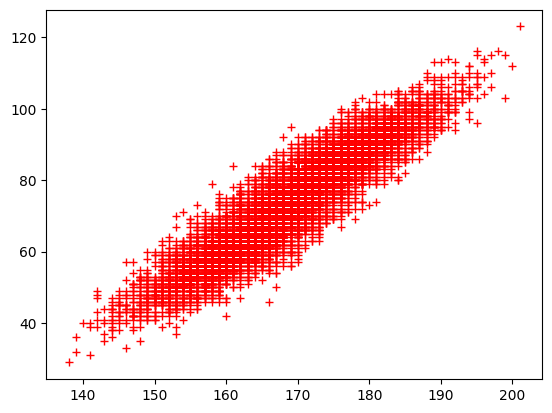

In [27]:
import matplotlib.pyplot as plt

plt.plot(data.Height, data.Weight, "r+")

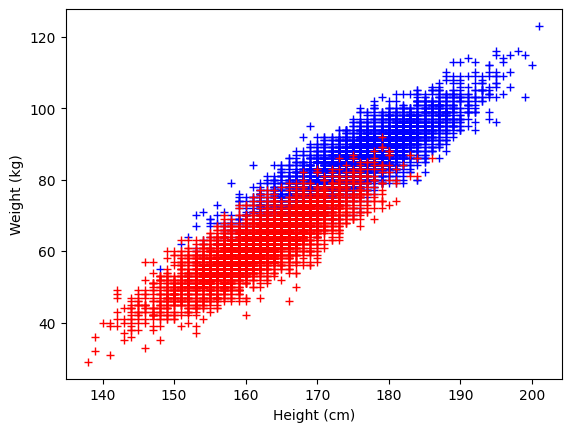

In [38]:
men = data[data.Gender == "Male"]
women = data[data.Gender == "Female"]

plt.plot(men.Height, men.Weight, "b+")
plt.plot(women.Height, women.Weight, "r+")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.savefig("gender_graph.png")
plt.show()

<BarContainer object of 10000 artists>

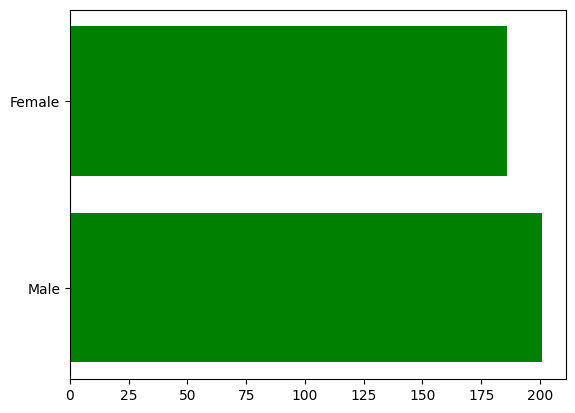

In [37]:
plt.rcdefaults()

fig, ax = plt.subplots()
ax.barh(data.Gender,data.Height, align='center',
        color='green', ecolor='black')

In [39]:
import pygraphviz as pgv

ModuleNotFoundError: No module named 'pygraphviz'

In [6]:
import pandas as pd
df1 = pd.DataFrame({"id": ['1','2','3'], "name":["aa","klk","piop"]})
df2 = pd.DataFrame({"age": ['11','29','35','77'], "height":[6.5,4.5,5.7,5.2]})

In [10]:
df_5 = pd.concat([df1,df2], axis=1)
df_6 = pd.concat([df1,df2], axis=1, join='inner')
print(df_5)
print(df_6)

    id  name age  height
0    1    aa  11     6.5
1    2   klk  29     4.5
2    3  piop  35     5.7
3  NaN   NaN  77     5.2
  id  name age  height
0  1    aa  11     6.5
1  2   klk  29     4.5
2  3  piop  35     5.7
